In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

内容出自文献：
A Simple Model of Circadian Rhythms Based on Dimerization and Proteolysis of PER and TIM

$\dfrac{dM}{dt} = \dfrac{k}{1 + (\dfrac{P(1-q)}{2P_c})^{nh}} - d_MM$

$\dfrac{dP}{dt} = vM - P \dfrac{V_1q + V_2(1-q)}{K+\dfrac{(1+q)P}{2}} - d_PP$

In [2]:
# define parameters
k = 1
v = 0.5
V1 = 10
V2 = 0.03
K = 0.05
dp = 0.1
dm = 0.1
Pc = 0.1
Keq = 30
nh = 2

# define Tyson model
def tyson(y, t):
    q = 2/(1 + np.sqrt(1 + 8*Keq*y[1]))
    dydt = np.empty(2)
    dydt[0] = k/(1 + (y[1] * (1-q)/2/Pc)**nh) - dm*y[0]
    dydt[1] = v*y[0] - (V1 * q + V2*(1-q))/(K + (1+q)*y[1]/2) * y[1] - dp*y[1]
    return dydt

# interesting parameters
# Keq = 30; nh = 2 => oscillations (Tyson's choice)
# Keq = 30; nh = 0 => bistability (no negative feedback)
# Keq = 200; nh = 0  => monostability (no negative feedback and positive feedback - all dimers)

In [8]:
Keq = 30
# nh: hill number, 
# 当nh为0的时候，负反馈被破坏，从而震荡现象也被破坏
# 此时两张图最后mRNA和protein呈现的状态不太相同，前者最后mRNA比protein多，后者相反
# 这是由于那个微妙的正反馈：double time dimers比monomers的降解速率慢很多，而这两者又有竞争关系，所以带来了正反馈调节
nh = 3

# run odeint 
t = np.arange(0, 500, 0.5)

# one initial condition
y1 = odeint(tyson, [0.001, 0.003], t)
# another different one
y2 = odeint(tyson, [80, 50], t)


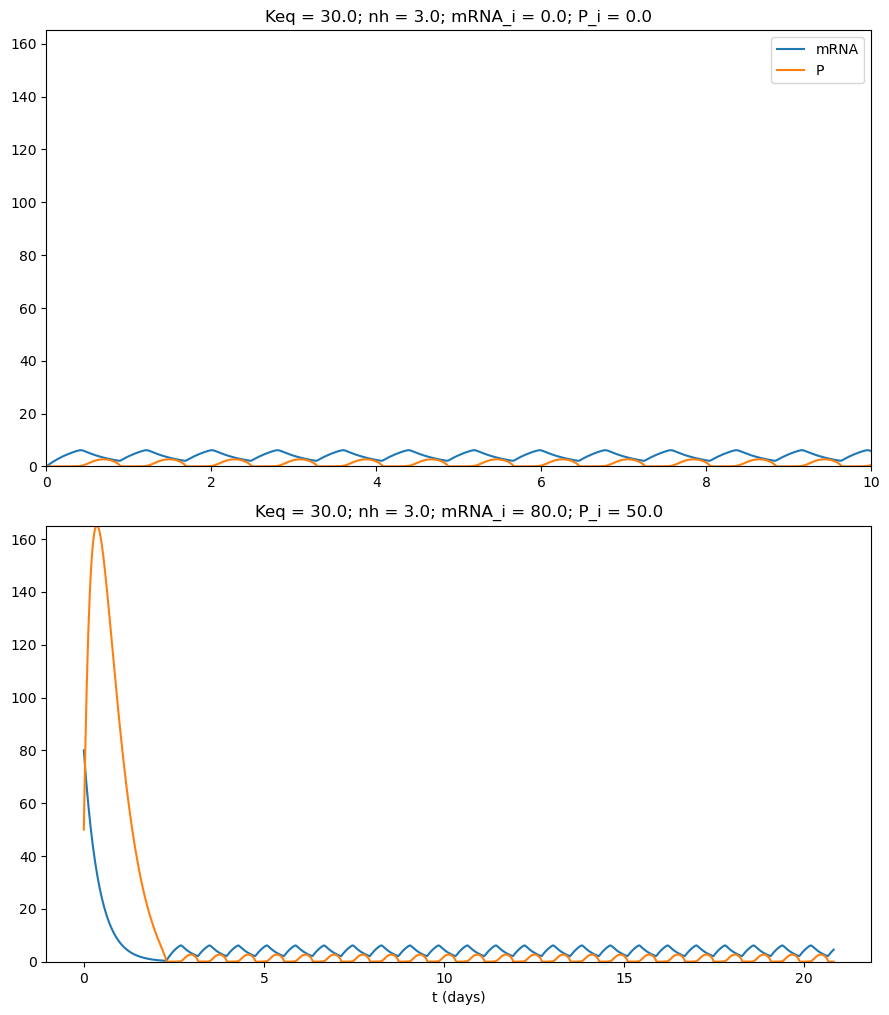

In [10]:
# plot time-series 
plt.figure(figsize = (9, 15))
plt.subplot(3,1,2)
plt.plot(t/24, y1[:,0], label = "mRNA")
plt.plot(t/24, y1[:,1], label = "P")
plt.ylim([0, np.max(np.vstack((y1, y2)))])
plt.xlim([0,10])
plt.legend()
plt.title("Keq = {:.1f}; nh = {:.1f}; mRNA_i = {:.1f}; P_i = {:.1f}".format(Keq, nh, y1[0,0], y1[0,1]))

plt.subplot(3,1,3)
plt.plot(t/24, y2[:,0], label = 'mRNA')
plt.plot(t/24, y2[:,1], label = 'P')
plt.ylim([0, np.max(np.vstack((y1, y2)))])
plt.xlabel('t (days)')
plt.title("Keq = {:.1f}; nh = {:.1f}; mRNA_i = {:.1f}; P_i = {:.1f}".format(Keq, nh, y2[0,0], y2[0,1]))

plt.tight_layout()
plt.show()

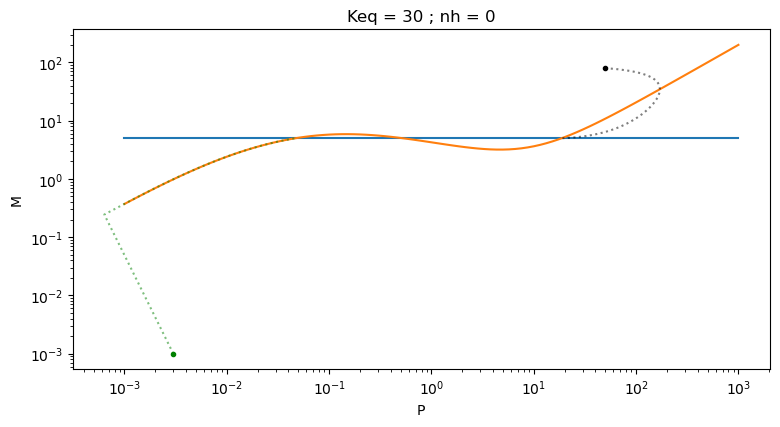

In [7]:
# plot nullclines
# nh=0的情况：
# 有三个交点
# nh= 0 且 Keq = 200的情况，则只有一个交点存在


M = np.logspace(-1, 2, 100)
P = np.logspace(-3, 3, 100)
q = 2/(1 + np.sqrt(1 + 8 * Keq * P))
plt.figure(figsize=(9, 15))
plt.subplot(3, 1, 1)
plt.plot(P, k/dm/(1 + (P * (1-q)/2/Pc)**nh))
plt.plot(P, (V1*q + V2*(1-q))/(K + (1 + q) * P/2)*P/v + dp/v*P)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('P')
plt.ylabel('M')
plt.title("Keq = " + str(Keq) + " ; nh = " + str(nh))

# plot trajectories
plt.plot(y1[:,1], y1[:, 0], 'g:', alpha = 0.5)
plt.plot(y1[0, 1], y1[0,0], 'g.')
plt.plot(y2[:,1], y2[:, 0], 'k:', alpha = 0.5)
plt.plot(y2[0, 1], y2[0,0], 'k.')

plt.show()